<a href="https://colab.research.google.com/github/jyotidabass/Stable-Diffusion-v1.5-Implementation-on-pytorch/blob/main/stable_diffusion_v1_5_implementation_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview
*Diffusion models are trained to denoise random Gaussian noise step-by-step to generate a sample of interest, such as an image or audio.*

## Install all the necessary libraries


In [ ]:
!pip install diffusers["torch",'flax'] transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 15.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.20.2-py3-none-any.whl size=1342633 sha256=de8f9a659d06d2d23b483d5f81f7a28f1e369d9c584d535a7db191cbc1f9b9a6
  Stored in directory: /root/.cache/pip/wheels/dc/8b/d9/34f7a1936109e05e9bba0cc2241a6f8cd89e25959dc7aae942
Successfully built diffusers


## Checkthe backend device

* Default is CPU
* Default GPU in Kaggle container's environment
* Default mps in macOS

In [ ]:
import os, platform

torch_device = 'cpu'

if 'kaggle' in os.environ.get('KAGGLE_URL_BASE','localhost'):
    torch_device = 'cuda'
else:
    torch_device = 'mps' if platform.system() == 'Darwin' else 'cpu'

In [ ]:
torch_device

'cuda'

### Enable using CPU if mps has not been support in some processing units

In [ ]:
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

## Load the model with from_pretrained() method

Models are initiated with the `from_pretrained()` method which also locally caches the model weight, so it is faster the next time you load the model.

In [ ]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

0it [00:00, ?it/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


The DiffusionPipline `downloads and caches all modeling`, `tokenization`, and `scheduling components`.

* **Pipelines(The DiffusionPipline)** is a `high-level` and end-to-end class designed to rapidly generate samples from pretrained diffusion models for interence.
* **Models(The pretained model)** architectures and modules that can be used as building blocks for creating diffusion systems.
* **Scheduler(Scheduling components)** algorithms that control how noise is added for training, and how to genrate denoised images during inference.

In [ ]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.20.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Swapping schedulers(if needed)

Different schedulers come with different denoising speeds and quality trade-offs. The best way to find out which one works best for you is to try them out. Below shows how to switch between schedulers

In [ ]:
from diffusers import EulerDiscreteScheduler

pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

### Runnin pipline on GPU

*mps for macOS local environment*

We move the generator object to a GPU/mps device below

In [ ]:
pipeline.to(torch_device)

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.20.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### Generating a image
Passing a text tprompt to the pipeline to generate an image, and then access the denoised image. By default, the image output is wrapped in a PIL.Image object.

  0%|          | 0/50 [00:00<?, ?it/s]

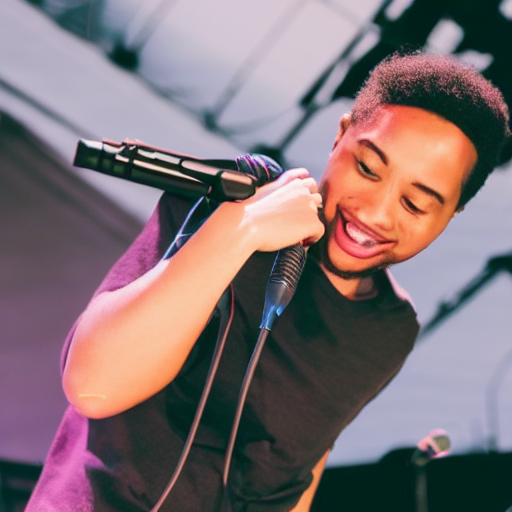

In [ ]:
image = pipeline("A person with a mic on stage").images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

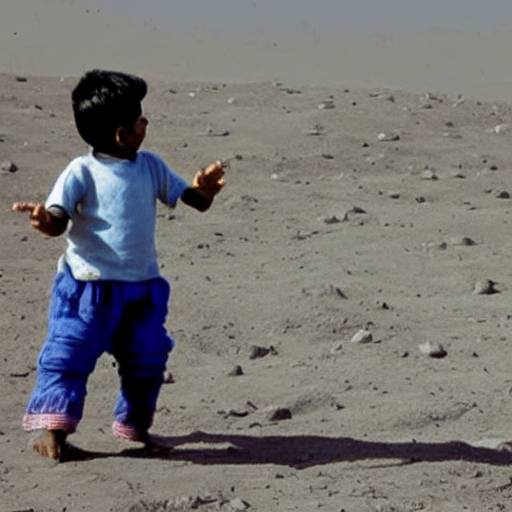

In [ ]:
image = pipeline("Children of India playing on moon").images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

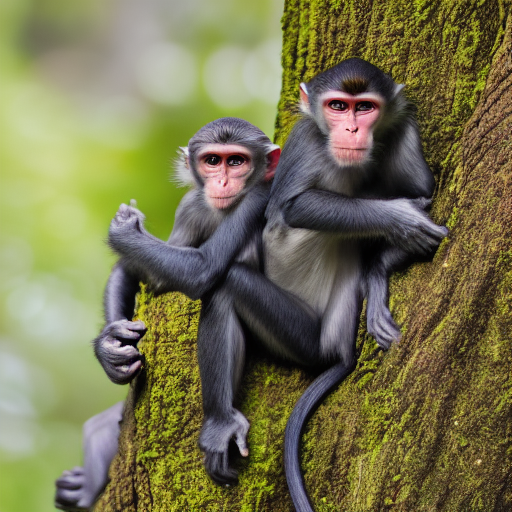

In [ ]:
image = pipeline("An image of monkeys on tree").images[0]
image

### Save the image to a file


In [ ]:
image.save("image_of_random_things.png")